**The purpose:** 

`To show a hierarchical clusterization approach to blend solutions. You can use this methodic to achieve a higher score of your own models.`

**What's new:**
* v7: 3 new 0.901-solution are added (see [8], [9], [10]).
* v7: all the 0.901-solutions are updated*
* v7: new clusters weights
* v6: Clusterization approach and scatter plots for solutions are added.

**Interesting results:**
* Solutions still can be grouped only into 3 clusters
* Solution **[5]** still remains the most weighted/valubale for the scoring.

\* if the current version of a source kernel doesn't have 0.901 score than the previous version is used (for example, s6-v1.csv dataset is used instead of the original kernel))

\* Previous version #6 of this kernel is [here](https://www.kaggle.com/darbin/clustering-blender-of-0-901-solutions?scriptVersionId=12339637)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# for hierarchical clusterization
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# system
from datetime import datetime
import os
sns.set()
print(os.listdir("../input"))


['s8v5-joshua-reed-santander-customer-transaction', '90-lines-solution-0-901-fast', 'santander-augment-to-the-rescue', 's3v32-ashish-gupta-eda-pca-scaler-lgbm', 's9v16-gauravtambi-lgbm-augmentation', 's7v19-subham-sharma-what-is-next-in-santander', 'eda-pca-lgbm-santander-transactions', 'best-parameters-lb-0-900', 'santander-magic-lgb-0-901', 'lightgbm-with-data-augmentation', 'lgbm-training-augmentation', 'eda-pca-simple-lgbm-on-kfold-technique', 'lgb-2-leaves-augment', 'santander-customer-transaction-prediction', 's1v8-nanashi-90-lines-solution-0901-fast', 's6v1-ole-morten-light-gbm-with-data-augment']


In [2]:
# inspired by [...]
s1=pd.read_csv('../input/s1v8-nanashi-90-lines-solution-0901-fast/s1-v8.csv')['target']#[1]
s2=pd.read_csv('../input/santander-magic-lgb-0-901/submission.csv')['target']#[2]
s3=pd.read_csv('../input/s3v32-ashish-gupta-eda-pca-scaler-lgbm/s3-v32.csv')['target']#[3]
s4=pd.read_csv('../input/eda-pca-simple-lgbm-on-kfold-technique/submission26.csv')['target']#[4]
s5=pd.read_csv('../input/lgb-2-leaves-augment/lgb_submission.csv')['target']#[5]
s6=pd.read_csv('../input/lightgbm-with-data-augmentation/2019-04-01_07_56_sub.csv')['target']#[6]
s7=pd.read_csv('../input/s7v19-subham-sharma-what-is-next-in-santander/s7-v19.csv')['target']#[7]
s8=pd.read_csv('../input/s8v5-joshua-reed-santander-customer-transaction/s8-v5.csv')['target']#[8]
s9=pd.read_csv('../input/s9v16-gauravtambi-lgbm-augmentation/s9-v16.csv')['target']#[9]
s10=pd.read_csv('../input/best-parameters-lb-0-900/submission.csv')['target']#[10]

submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')

solutions_set = pd.DataFrame({'s1': s1, 's2': s2, 's3': s3, 's4': s4, 's5': s5, 's6': s6,
                              's7': s7, 's8': s8, 's9': s9, 's10': s10})

# Preprocessing

In [3]:
# Scaling
scaler = MinMaxScaler()  
solutions_set_scaled = scaler.fit_transform(solutions_set)
solutions_set_scaled = pd.DataFrame(solutions_set_scaled, columns = solutions_set.columns)

# Solutions clusters

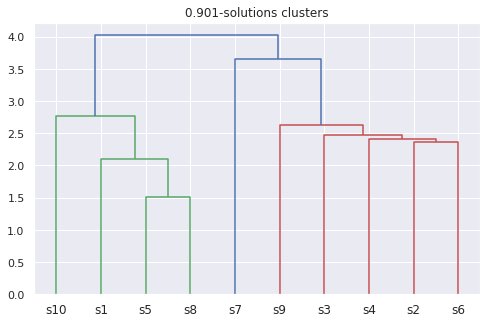

In [4]:
# transpose and convert solutions set to numpy
np_solutions_set = solutions_set_scaled.T.values
# calculate the distances
solutions_set_dist = pdist(np_solutions_set)
# hierarchical clusterization
linked = linkage(solutions_set_dist, 'ward')

# dendrogram
fig = plt.figure(figsize=(8, 5))
dendrogram(linked, labels = solutions_set_scaled.columns)
plt.title('0.901-solutions clusters')
plt.show()

As we can see there are 3 clusters of solutions, as previously: 
    1. blue: s7 (see [7])
    2. green: s1, s5, s8, s10 (see [1], [5], [8], [10])
    3. red: s3, s6, s2, s4, s9 (see [3], [6], [2], [4], [9])

Solutions s8 [8] and s10 [10] joined the green cluster. Solution s9 [9] joined the red cluster.

Solutions in red cluster are very close to each other.

Additional information about the clusters:
    1. solution s7 - has AUC ~0.9010, speed ~4987 sec.
    2. solution s5 - has AUC ~0.9016, speed ~22080 sec.
    3. solution s6 - has AUC ~0.9011, speed ~27813 sec.

Text(0.5, 1.0, 'Kendall correlation of the 0.901-solutions')

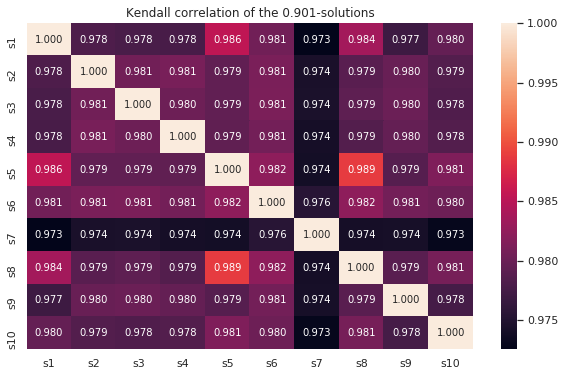

In [5]:
# kendall correlation between the submissions
# since we use AUC (the order is important), and distribution of the probability is not Normal, Kendal correlation is more appropriate
plt.figure(figsize=(10, 6))
kendall = solutions_set.corr(method = 'kendall')
sns.heatmap(kendall, annot = True, fmt = ".3f")
plt.title('Kendall correlation of the 0.901-solutions')

As we can see clusterization combined the most correlated solutions

# Scatter plots for solutions clusters

Let's take that s7 represents **solutions cluster** #1 (blue), s5 - cluster #2 (green), and s6 - cluster #3 (red)

Text(0.5, 1.0, 'Submisions of s7 and s5')

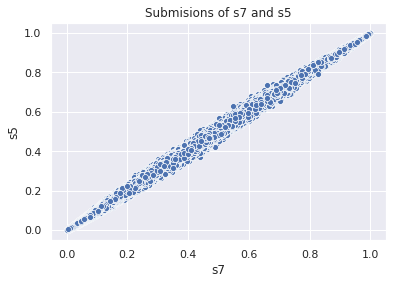

In [6]:
sns.scatterplot(x = 's7', y = 's5', data = solutions_set_scaled)
plt.title('Submisions of s7 and s5')

Text(0.5, 1.0, 'Submisions of s7 and s6')

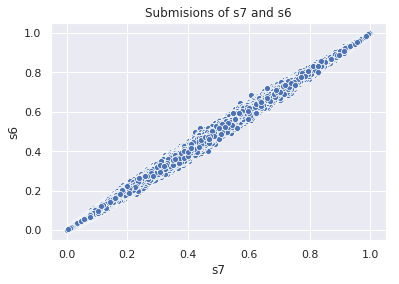

In [7]:
sns.scatterplot(x = 's7', y = 's6', data = solutions_set_scaled)
plt.title('Submisions of s7 and s6')

Text(0.5, 1.0, 'Submisions of s6 and s5')

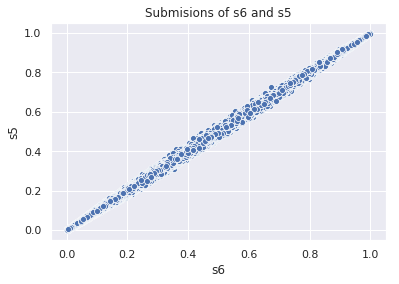

In [8]:
sns.scatterplot(x = 's6', y = 's5', data = solutions_set_scaled)
plt.title('Submisions of s6 and s5')

As the graphs show, there are no outliers.

# Blending

We will use scaled submissions (transformed so that they have the same min and max values).
Taking into consideration that we have 3 clusters and that cluster #2 (which includes solution s5 [5]) has higher AUC (0.9016) comparatively to clusters #1 (0.9010) and #3 (0.9011), let's suggest the following weights and formula:

In [9]:
# get scaled submissions s1, s2 ... s7
for s in solutions_set_scaled.columns:
    s = solutions_set_scaled[s]
    
cluster1 = s7
cluster2 = 1/2*(s1 + s5 + s8 + s10)
cluster3 = 1/4*(s2 + s3 + s4 + s6 + s9)

submission['target'] = 0.1*cluster1 + 0.8*cluster2 + 0.1*cluster3

# Submission

In [10]:
filename="blended_submission_{:%Y-%m-%d_%H_%M}.csv".format(datetime.now())
submission.to_csv(filename, index=False)

# Inspired by:

[0] [Nanashi (#150), "Simple blend (my best score)"](https://www.kaggle.com/jesucristo/simple-blend-my-best-score)

[1] [Nanashi (#150), "90 lines solution 0.901 #Fast": V8](https://www.kaggle.com/jesucristo/90-lines-solution-0-901-fast?scriptVersionId=11837989). Dataset: s1-v8

[2] [Nanashi (#150), "Santander Magic LGB 0.901": V21](https://www.kaggle.com/jesucristo/santander-magic-lgb-0-901?scriptVersionId=11960403). Dataset: original (current version of kernel)

[3] [Ashish Gupta (#271), "EDA, PCA + LGBM : Santander Transactions": V32](https://www.kaggle.com/roydatascience/eda-pca-lgbm-santander-transactions?scriptVersionId=11798375). Dataset: s3-v32

[4] [Ashish Gupta (#271), "EDA, PCA + Simple LGBM on KFold Technique"](https://www.kaggle.com/roydatascience/eda-pca-simple-lgbm-on-kfold-technique). Dataset: original (current version of kernel)

[5] [Jiwei Liu (#8), "LGB 2 leaves + augment"](https://www.kaggle.com/jiweiliu/lgb-2-leaves-augment). Dataset: original (current version of kernel)

[6] [Ole Morten Grodås (#686), "Lightgbm with data augmentation"](https://www.kaggle.com/omgrodas/lightgbm-with-data-augmentation). Dataset: original (current version of kernel)

[7] [Subham Sharma (#2123), "Santander (-: Augment to the rescue": V19](https://www.kaggle.com/subhamsharma96/santander-augment-to-the-rescue?scriptVersionId=11821134). Dataset: s7-v19

[8] [Joshua Reed (#1909), "Santander Customer Transaction Prediction": V5](https://www.kaggle.com/josh24990/santander-customer-transaction-prediction). Dataset: s8-v5

[9] [GauravTambi (#1567), "LGBM + Augmentation": V16](https://www.kaggle.com/gtambi/lgbm-augmentation?scriptVersionId=12043767). Dataset: s9-v16

[10] [Deepak N (#2150), "Best Parameters LB 0.900"](https://www.kaggle.com/deepak525/best-parameters-lb-0-900). Dataset: original (current version of kernel)

# Hierarchical clusterization components:

- [scipy dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
- [scipy pdist](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html)
- [scipy linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)